Source: https://huggingface.co/learn/nlp-course/chapter2/3?fw=pt

# Models

https://youtu.be/AhChOFRegn4

In this section we'll take a closer look at creating and using a model. We'll use the AutoModel class, which is handy when you want to instantiate any model from a checkpoint.

The AutoModel class and all of its relatives are actually simple wrappers over the wide variety of models available in the library. It's a clever wrapper as it can automatically guess the appropriate model architecture for your checkpoint, and then instantiates a model with this architecture.

However, if you know the type of model you want to use, you can use the class that defines its architecture directly. Let's take a look at how this works with a BERT model.

## Creating a Transformer

The first thing we'll need to do to initialize a BERT model is load a configuration object:

In [1]:
from transformers import BertConfig, BertModel

# Building the config
config = BertConfig()

# Building the model from the config
model = BertModel(config)

The configuration contains many attributes that are used to build the model:

In [2]:
print(config)

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



While you haven't seen what all of these attributes do yet, you should recognize some of them: the hidden_size attribute defines the size of the hidden_states vector, and num_hidden_layers defines the number of layers the Transformer model has.

## Different loading methods

Creating a model from the default configuration initializes it with random values:

In [3]:
from transformers import BertConfig, BertModel

config = BertConfig()
model = BertModel(config)

# Model is randomly initialized!

The model can be used in this state, but it will output gibberish; it needs to be trained first. We could train the model from cratch on the task at hand, but as you saw in Chapter 1, this would require a long time and a lot of data, and it would have a non-negligible environmental impact. To avoid unnecessary and duplicated effort, it's imperative to be able to share and reuse models that have already been trained.

Loading a Transformer model that is already trained is simple - we can do this using the from_pretrained() method:

In [4]:
from transformers import BertModel

model = BertModel.from_pretrained("bert-base-cased")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


As you saw earlier, we could replace BertModel with the equivalent AutoModel class. We'll do this from now on as this produces checkpoint-agnostic code; if your code works for one checkpoint, it should work seamlessly with another. This applies even if the architecture is different, as long as the checkpoint was trained for a similar task (for example, a sentiment analysis task).

In the code sample above we didn't use BertConfig, and instead loaded a pretrained model via the bert-base-cased identifier. This is a model checkpoint that was trained by the authors of BERT themselves; you can find more details about it in this model card (https://huggingface.co/bert-base-cased).

This model is now initialized with all the weights of the checkpoint. It can be used directly for inference on the tasks it was trained on, and it can also be fine-tuned on a new task. By training with pretrained weights rather than from scratch, we can quickly achieve good results.

The weights have been downloaded and cached (so future calls to the from_pretrained() method won't re-download them) in the cache folder, which defaults to *~/.cache/huggingface/transformers*. You can customize your cache folder by setting the HF_HOME environment variable.

The identifier used to load the model can be the identifier of any model on the Model Hub, as long as it is compatible with the BERT architecture. The entire list of available BERT checkpoints can be found here: https://huggingface.co/models?filter=bert

## Saving methods

Saving a model is as easy as loading one - we use the save_pretrained() method, which is analogous to the from_pretrained() method:

In [25]:
model.save_pretrained("directory_on_my_computer")

This saves two files to your disk:

In [29]:
ls

 Volume in drive C is Windows
 Volume Serial Number is BABA-9F6B

 Directory of C:\Users\rober\Desktop\DataScience\SelfProjects\StudyMaterial\HuggingFace\2 Using ?? Transformers

04/25/2023  04:39 PM    <DIR>          .
04/25/2023  04:39 PM    <DIR>          ..
04/25/2023  04:17 PM    <DIR>          .ipynb_checkpoints
04/24/2023  11:48 AM             3,178 01 Introduction.ipynb
04/25/2023  04:17 PM           127,075 02 Behind the pipeline.ipynb
04/25/2023  04:39 PM            11,059 03 Models.ipynb
04/25/2023  04:39 PM    <DIR>          directory_on_my_computer
               3 File(s)        141,312 bytes
               4 Dir(s)  420,380,246,016 bytes free


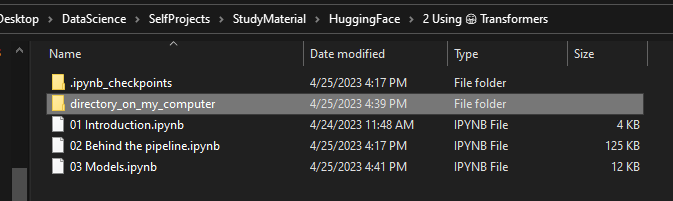

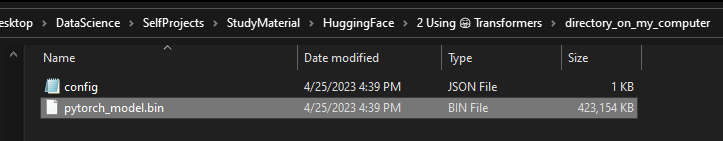

If you take a look at the *config.json* file, you'll recognize the attributes necessary to build the model architecture. This file also contains some metadata, such as where the checkpoint orginated and what 🤗 Transformers version you were using when you last saved the checkpoint.

The pytorch_model.bin file is known as the *state dictionary*; it contains all your model's weights. The two files go hand in hand; the configuration is necessary to know your model's architecture, while the model weights are your model's parameters.

## Using a Transformer model for inference

Now that you know how to load and save a model, let's try using it to make some predictions. Transformer models can only process numbers - numbers that the tokenizer generates. But before we discuss tokenizers, let's explore what inputs the model accepts.

Tokenizers can take care of casting the inputs to the appropriate framework's tensors, but to help you understand what's going on, we'll take a quick look at what must be done before sending the inputs to the model.

Let's say we have a couple of sequences:

In [5]:
sequences = ["Hello!", "Cool.", "Nice!"]

The tokenizer converts these to vocabulary indices which are typically called *input IDs*. Each sequence is now a list of numbers! The resulting output is:

In [6]:
ls directory_on_my_computer

 Volume in drive C is Windows
 Volume Serial Number is BABA-9F6B

 Directory of C:\Users\rober\Desktop\DataScience\SelfProjects\StudyMaterial\HuggingFace\2 Using ?? Transformers\directory_on_my_computer

04/25/2023  04:39 PM    <DIR>          .
04/25/2023  04:39 PM    <DIR>          ..
04/25/2023  04:39 PM               682 config.json
04/25/2023  04:39 PM       433,309,485 pytorch_model.bin
               2 File(s)    433,310,167 bytes
               2 Dir(s)  419,527,311,360 bytes free


In [15]:
#Could not get the encoded sequences to work.
#Added this to get a result but it did not match what was given

from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

encoded_sequences = tokenizer.encode(sequences)

In [16]:
encoded_sequences

[101, 100, 100, 100, 102]

This is a list of encoded sequences: a list of lists. Tensors only accept rectangular shapes (think matrices). This "array" is already of rectangular shape, so converting it to a tensor is easy:

In [17]:
import torch

model_inputs = torch.tensor(encoded_sequences)

## Using the tensors as inputs to the model

Making use of the tensors with the model is extremely simple - we just call the model with the inputs:

*Note: my encoded_sequences did not match what was given so the output failed.*

While the model accepts a lot of different arguments, only the input IDs are necessary. We'll explain what the other arguments do and when they are required later, but first we need to take a closer look at the tokenizers that build the inputs that a Transformer model can understand.